In [97]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Import additional libraries for stacked LSTM
from keras.layers import TimeDistributed

In [20]:
# Import
df0 = pd.read_csv('Sample_Market_SKU_data.csv')
#NOTE: This is a horizontal, row-wise, time series dataset
df0.head()

,Market,Sales Product,21-Dec,22-Jan,22-Feb,22-Mar,22-Apr,22-May,22-Jun,22-Jul,...,24-Feb,24-Mar,24-Apr,24-May,24-Jun,24-Jul,24-Aug,24-Sep,24-Oct,24-Nov
0,AFRICA,AB12345,305,302,1503,1471,1583,2080,1490,672,...,787,1417,847,777,1128,1427,846,1475,1572,927
1,ASIA,AB12346,1892,1071,2065,841,1542,2142,691,103,...,615,1166,1538,1206,1129,290,426,762,1775,777
2,OCEANIA,AC12347,1728,1912,193,102,465,1279,1748,1817,...,1834,1392,1746,759,2258,2062,223,142,635,1295
3,EUROPE,AD12348,776,1499,660,1127,214,174,351,1184,...,561,316,1961,1005,1936,331,432,873,1753,870
4,NORTH AMERICA,AS12349,720,1101,1516,1395,967,44,638,521,...,975,1329,933,310,1533,1836,1644,2095,2268,1076


In [58]:
#Remove the non-numeric columns,
#Find the shape for tensor operations
df1=df0.iloc[:1,2:] #select the first time series AFRICA	AB12345	
df1.shape

(1, 36)

In [66]:
arr1=np.array(df1)
data=arr1.reshape(36,)
data.shape

(36,)

In [92]:
# Define lookback window
lookback_window =6
# Create input and output sequences
X = []
y = []
for i in range(lookback_window, len(data)):
    X.append(data[i - lookback_window:i])
    y.append(data[i])

X = np.array(X)
y = np.array(y)
# Split into training and testing sets
train_size = int(len(X) * 0.95)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [93]:
X_train.shape

(28, 6)

In [94]:
X_test.shape

(2, 6)

In [87]:
# Create a Vanilla LSTM model
## expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(lookback_window, 1)))
#model.add(TimeDistributed(Dense(units=20)))  # Add a TimeDistributed layer for stacked LSTM
#model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True), input_shape=(lookback_window, 1))) #Add a bi-layer for Bi-LSTM
#model.add(Dropout(0.2))  # Add a dropout layer to prevent overfitting
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=3)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Epoch 1/100


C:\Users\neogi\Documents\Python_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2035072.2500
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1188104.8750
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 916763.8125  
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1097650.0000 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 593780.6875 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 921427.8750 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 760799.5625 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 564769.0000 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 596448.2500 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 632234.3750  
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 480580.6562 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 470149.0000 
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 539744.6875 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 419582.1875 
Epoch 15/100
9/9 ━━━━━

In [73]:
# Predict the next 21 points with feedback
n_future = 21
y_future = []
x_pred = X[-1:, :]  # last observed input sequence
y_pred = y[-1]         # last observed target value

for i in range(n_future):

    # feed the last forecast back to the model as an input
    x_pred = np.append(x_pred[:, 1:], y_pred.reshape(1, 1), axis=1)

    # generate the next forecast
    y_pred = model.predict(x_pred)

    # save the forecast
    y_future.append(y_pred.flatten()[0])

print(x_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[898.45428467 777.80279541 583.31469727 639.5133667  916.59460449
  395.31661987]]


In [ ]:
# Create a DataFrame for the predicted values
predictions_df2 = pd.DataFrame({'Predicted Values': y_future})
# Save the predictions to a CSV file and export it
predictions_df2.to_csv('predictions_VanillaLSTM_OUTPUT.csv', index=False)

In [113]:
#Create dataframes to visualise the forecast
data_df=pd.DataFrame(data)
y_future=pd.DataFrame(y_future)
final=pd.concat([data_df,y_future],ignore_index=True)
final.rename(columns={0: 'Actuals', 'Predicted Values': 'Forecast'}, inplace=True)

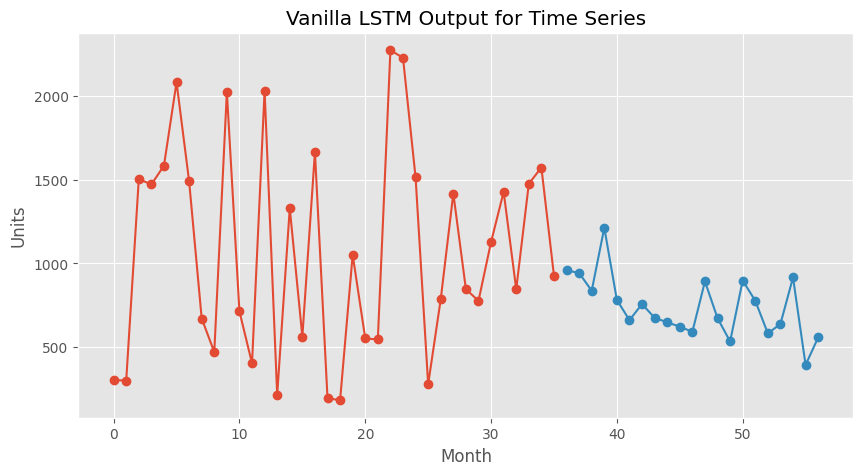

In [120]:
#Plot with the forecast with actuals
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(final, marker='o')
plt.title('Vanilla LSTM Output for Time Series')
plt.xlabel('Month')
plt.ylabel('Units')
plt.show()